In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [107]:
# how to read an excel file in data folder
# the file is named 'Euro 2020 Match and Goal Data.xlsx'
# the file is in the data folder
# the file has multiple sheets
# the file has 3 sheets

df_match_data =pd.read_excel('../data/Euro 2020 Match and Goal Data.xlsx',skiprows=2, sheet_name=0) 
df_goal_data = pd.read_excel('../data/Euro 2020 Match and Goal Data.xlsx', sheet_name=1) 
df_goal_data.head(5)

,Match ID,Time in Match,Home Team,Away Team,Home (1) or Away (0) Goal,Goalscorer,Assister,Bodypart,Assist Method,Situation,Unnamed: 10,Source: FotMob
0,1,53,Turkey,Italy,0.0,NaN,NaN,NaN,0,1.0,NaN,NaN
1,1,66,Turkey,Italy,0.0,Ciro Immobile,Leanardo Spinazzola,1.0,5,1.0,NaN,NaN
2,1,79,Turkey,Italy,0.0,Lorenzo Insigne,Ciro Immobile,1.0,1,1.0,NaN,NaN
3,2,49,Wales,Switzerland,0.0,Breel Embolo,Xherdan Shaqiri,3.0,2,3.0,NaN,NaN
4,2,74,Wales,Switzerland,1.0,Kieffer Moore,Joe Morrell,3.0,2,1.0,NaN,NaN


In [108]:
# merge the two dataframes on the 'MatchID' column
df_merge = pd.merge(df_match_data, df_goal_data, on='Match ID')
df_merge.head(5)


,Match ID,Location,Referee,Ref Nationality,Attendance,Home,Away,Goals Home,Goals Away,Subs Used,...,Home Team,Away Team,Home (1) or Away (0) Goal,Goalscorer,Assister,Bodypart,Assist Method,Situation,Unnamed: 10,Source: FotMob
0,1,Rome,Danny Makkelie,Netherlands,12916,Turkey,Italy,0,3,4,...,Turkey,Italy,0.0,NaN,NaN,NaN,0,1.0,NaN,NaN
1,1,Rome,Danny Makkelie,Netherlands,12916,Turkey,Italy,0,3,4,...,Turkey,Italy,0.0,Ciro Immobile,Leanardo Spinazzola,1.0,5,1.0,NaN,NaN
2,1,Rome,Danny Makkelie,Netherlands,12916,Turkey,Italy,0,3,4,...,Turkey,Italy,0.0,Lorenzo Insigne,Ciro Immobile,1.0,1,1.0,NaN,NaN
3,2,Baku,Clement Turpin,France,8782,Wales,Switzerland,1,1,2,...,Wales,Switzerland,0.0,Breel Embolo,Xherdan Shaqiri,3.0,2,3.0,NaN,NaN
4,2,Baku,Clement Turpin,France,8782,Wales,Switzerland,1,1,2,...,Wales,Switzerland,1.0,Kieffer Moore,Joe Morrell,3.0,2,1.0,NaN,NaN


In [109]:
# print all row contabining 'NaN' in the 'Home (1) or Away (0) Goal' column in merged dataframe
df_merge[df_merge['Home (1) or Away (0) Goal'].isnull()]
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Match ID                   142 non-null    int64  
 1   Location                   142 non-null    object 
 2   Referee                    142 non-null    object 
 3   Ref Nationality            142 non-null    object 
 4   Attendance                 142 non-null    int64  
 5   Home                       142 non-null    object 
 6   Away                       142 non-null    object 
 7   Goals Home                 142 non-null    int64  
 8   Goals Away                 142 non-null    int64  
 9   Subs Used                  142 non-null    int64  
 10  Ball Possession            142 non-null    float64
 11  xG                         142 non-null    float64
 12  Chances Created            142 non-null    int64  
 13  Big Chances                142 non-null    int64  

In [110]:
# delete columns name star with "Unnamed:" and "Sourc" from the merged dataframe
df_merge = df_merge.loc[:, ~df_merge.columns.str.contains('^Unnamed:')]
df_merge = df_merge.loc[:, ~df_merge.columns.str.contains('^Sourc')]
df_merge.head()

,Match ID,Location,Referee,Ref Nationality,Attendance,Home,Away,Goals Home,Goals Away,Subs Used,...,Red Cards.1,Time in Match,Home Team,Away Team,Home (1) or Away (0) Goal,Goalscorer,Assister,Bodypart,Assist Method,Situation
0,1,Rome,Danny Makkelie,Netherlands,12916,Turkey,Italy,0,3,4,...,0,53,Turkey,Italy,0.0,NaN,NaN,NaN,0,1.0
1,1,Rome,Danny Makkelie,Netherlands,12916,Turkey,Italy,0,3,4,...,0,66,Turkey,Italy,0.0,Ciro Immobile,Leanardo Spinazzola,1.0,5,1.0
2,1,Rome,Danny Makkelie,Netherlands,12916,Turkey,Italy,0,3,4,...,0,79,Turkey,Italy,0.0,Lorenzo Insigne,Ciro Immobile,1.0,1,1.0
3,2,Baku,Clement Turpin,France,8782,Wales,Switzerland,1,1,2,...,0,49,Wales,Switzerland,0.0,Breel Embolo,Xherdan Shaqiri,3.0,2,3.0
4,2,Baku,Clement Turpin,France,8782,Wales,Switzerland,1,1,2,...,0,74,Wales,Switzerland,1.0,Kieffer Moore,Joe Morrell,3.0,2,1.0


In [111]:
# fill the 'NaN' values in the 'Home (1) or Away (0) Goal' column with '1'
df_merge['Home (1) or Away (0) Goal'].fillna(1, inplace=True)


C:\Users\huyho\AppData\Local\Temp\ipykernel_14148\3781632488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['Home (1) or Away (0) Goal'].fillna(1, inplace=True)


- Fill 1 in this NaN because in this match have 2 goal from Away team

In [112]:
#checking missing values
#show all columns with missing values in the merged dataframe
df_merge.columns[df_merge.isnull().any()]

Index(['Goalscorer', 'Assister', 'Bodypart', 'Situation'], dtype='object')

In [113]:
# fill all missing values in the merged dataframe at columns 'Goalscorer' and 'Assisted by' with 'Unknown'
df_merge['Goalscorer'].fillna('Unknown', inplace=True)
df_merge['Assister'].fillna('Unknown', inplace=True)

C:\Users\huyho\AppData\Local\Temp\ipykernel_14148\3732640017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['Goalscorer'].fillna('Unknown', inplace=True)
C:\Users\huyho\AppData\Local\Temp\ipykernel_14148\3732640017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [114]:
# fill all missing values in the merged dataframe at columns 'Bodypart' with 'Other', at column 'Situation' with 1
df_merge['Bodypart'].fillna('Other', inplace=True)
df_merge['Situation'].fillna(1,inplace=True)

C:\Users\huyho\AppData\Local\Temp\ipykernel_14148\1689658645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['Bodypart'].fillna('Other', inplace=True)
C:\Users\huyho\AppData\Local\Temp\ipykernel_14148\1689658645.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge['Bodypart'].fillna('Other', inplace=True)
C:\Users\huyho\AppData\

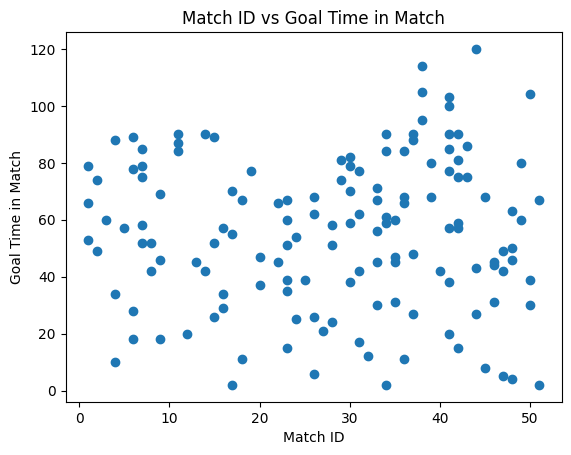

In [115]:
#draw scatter plot of 'MatchID' vs 'Time in Match' in the merged dataframe
plt.scatter(df_merge['Match ID'], df_merge['Time in Match'])
plt.xlabel('Match ID')
plt.ylabel('Goal Time in Match')
plt.title('Match ID vs Goal Time in Match')
plt.show()

In [116]:
# calculate the win rate of the home team in the merged dataframe by way comparing the goal of home team as 'Goals Homne' and away team as 'Goals Away'
df_merge['Home Team Win'] = df_merge['Goals Home'] > df_merge['Goals Away']
print("Home  team win rate:",df_merge['Home Team Win'].mean()*100)
df_merge['Away Team Win'] = df_merge['Goals Away'] > df_merge['Goals Home']
print("Away team win rate:",df_merge['Away Team Win'].mean()*100)
df_merge['Draw'] = df_merge['Goals Away'] == df_merge['Goals Home']
print("Draw rate:",df_merge['Draw'].mean()*100)


Home  team win rate: 32.3943661971831
Away team win rate: 47.88732394366197
Draw rate: 19.718309859154928


In [117]:
# correlation between colum 'Ball Possession' of home  team with datatype (float) and 'home team win' in the merged dataframe 
df_merge['Ball Possession'] = df_merge['Ball Possession'].astype(float)
df_merge['Home Team Win'] = df_merge['Home Team Win'].astype(int)
print('Corr of ball possession of home team and win is: ',df_merge['Home Team Win'].corr(df_merge['Ball Possession']))



## correlation between colum 'Ball Possession.1' of home  team with datatype (float) and 'Away Team Win' in the merged dataframe 
df_merge['Ball Possession.1'] = df_merge['Ball Possession.1'].astype(float)
df_merge['Away Team Win'] = df_merge['Away Team Win'].astype(int)
print('Corr of ball possession of away team and win is: ',df_merge['Away Team Win'].corr(df_merge['Ball Possession.1']))




Corr of ball possession of home team and win is:  0.2817975573365704
Corr of ball possession of away team and win is:  0.3823153866413903


corr is not enough strong, Ball possession is not made team have better changes to win

Corr of Chances Created of home team and win is:  0.32008415109239624
Corr of Chances Created of away team and win is:  0.41722168965081435


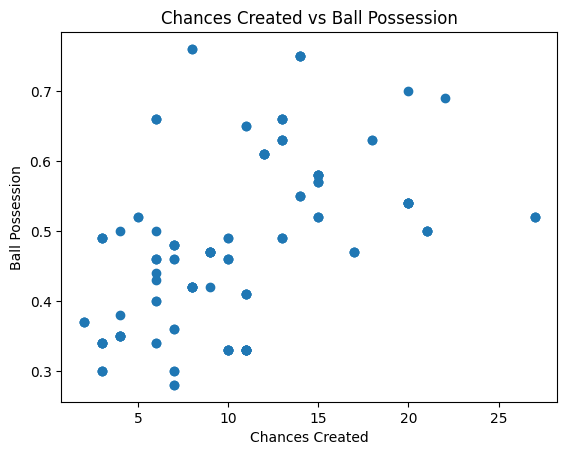

In [119]:
# correlation between colum 'Chances Created' of home  team with datatype (int) and 'home team win' in the merged dataframe
df_merge['Chances Created'] = df_merge['Chances Created'].astype(int)
df_merge['Home Team Win'] = df_merge['Home Team Win'].astype(int)
print('Corr of Chances Created of home team and win is: ',df_merge['Home Team Win'].corr(df_merge['Chances Created']))

# correlation between colum 'Chances Created.1' of away  team with datatype (int) and 'Away Team Win' in the merged dataframe
df_merge['Chances Created.1'] = df_merge['Chances Created.1'].astype(int)
df_merge['Away Team Win'] = df_merge['Away Team Win'].astype(int)
print('Corr of Chances Created of away team and win is: ',df_merge['Away Team Win'].corr(df_merge['Chances Created.1']))


# darw a scatter plot of 'Chances Created' of home team vs 'Ball Possession' of home team in the merged dataframe
plt.scatter(df_merge['Chances Created'], df_merge['Ball Possession'])
plt.xlabel('Chances Created')
plt.ylabel('Ball Possession')
plt.title('Chances Created vs Ball Possession')
plt.show()

Mean of Ball Possession of home team is:  0.482394366197183
Mean of Ball Possession of away team is:  0.5176056338028169


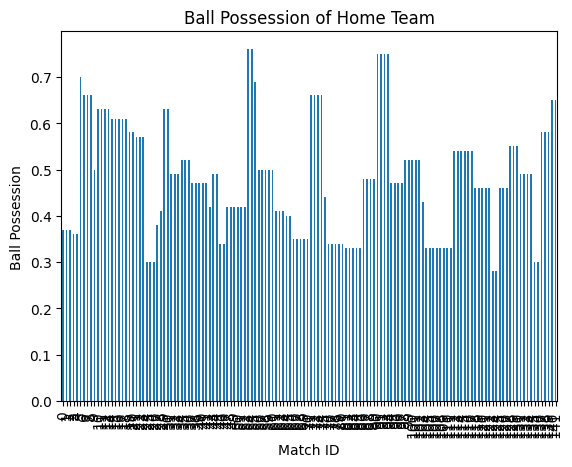

In [126]:
# mean of 'Ball Possession' of home team in the merged dataframe
print('Mean of Ball Possession of home team is: ',df_merge['Ball Possession'].mean())
# mean of 'Ball Possession' of away team in the merged dataframe
print('Mean of Ball Possession of away team is: ',df_merge['Ball Possession.1'].mean())

# draw a bar plot of 'Ball Possession' of specific team in the merged dataframe
df_merge['Ball Possession'].plot(kind='bar')
plt.xlabel('Match ID')
plt.ylabel('Ball Possession')
plt.title('Ball Possession of Home Team')
plt.show()


In [143]:
# create a new dataframe with colums "Team", "Mean of Ball Possession", "Mean of Ball Possession.1", "mean of all ball possession","Home Team Goals","Away Team Goals","Home Team Win Rate","Away Team Win Rate","Draw rate"
df_winRateByTeam = pd.DataFrame()
# 'Team' column is the unique values of 'Home Team' column in the merged dataframe
df_winRateByTeam['Team'] = df_merge['Home Team'].unique()

# 'Mean of Ball Possession' column is the mean of 'Ball Possession' in the merged dataframe of specific, created filter for specific team of "Team" colums in df_winRateByTeam

df_winRateByTeam['Mean of Ball Possession'] = df_merge.groupby('Home Team')['Ball Possession'].mean().values

# 'Mean of Ball Possession.1' column is the mean of 'Ball Possession.1' of away team in the merged dataframe
#df_winRateByTeam['Mean of Ball Possession.1'] = df_merge.groupby('Away Team')['Ball Possession.1'].mean().values
df_winRateByTeam['Mean of Ball Possession.1'] = df_winRateByTeam['Team'].map(df_merge.groupby('Away Team')['Ball Possession.1'].mean())

# 'mean of all ball possession' column is the mean of 'Ball Possession' and 'Ball Possession.1' in the merged dataframe
df_winRateByTeam['mean of all ball possession'] = (df_winRateByTeam['Mean of Ball Possession'] + df_winRateByTeam['Mean of Ball Possession.1'])/2

# 'Total Goals' column is the sum of 'Goals Home' and 'Goals Away' in the merged dataframe
#df_winRateByTeam['Total Goals'] = df_merge.groupby('Home Team')['Goals Home'].sum().values + df_merge.groupby('Away Team')['Goals Away'].sum().values

# 'Home Team Goals' column is the sum of 'Goals Home' in the merged dataframe
df_winRateByTeam['Home Team Goals'] = df_merge.groupby('Home Team')['Goals Home'].sum().values

# 'Away Team Goals' column is the sum of 'Goals Away' in the merged dataframe
#df_winRateByTeam['Away Team Goals'] = df_winRateByTeam['Team'].map(df_merge.groupby('Away Team')['Goals Away'].sum().values)
df_winRateByTeam['Away Team Goals'] = df_winRateByTeam['Team'].map(df_merge.groupby('Away Team')['Goals Away'].sum())

# 'Home Team Win Rate' column is the mean of 'Home Team Win' in the merged dataframe
df_winRateByTeam['Home Team Win Rate'] = df_merge.groupby('Home Team')['Home Team Win'].mean().values

# 'Away Team Win Rate' column is the mean of 'Away Team Win' in the merged dataframe
df_winRateByTeam['Away Team Win Rate'] = df_winRateByTeam['Team'].map(df_merge.groupby('Away Team')['Away Team Win'].mean())

# 'Draw rate' column is the mean of 'Draw' in the merged dataframe
#df_winRateByTeam['Draw rate'] = df_merge.groupby('Home Team')['Draw'].mean().values

df_winRateByTeam.head(-1)

,Team,Mean of Ball Possession,Mean of Ball Possession.1,mean of all ball possession,Home Team Goals,Away Team Goals,Home Team Win Rate,Away Team Win Rate
0,Turkey,0.630000,0.500000,0.565000,12,4.0,1.000000,0.000000
1,Wales,0.541429,0.350000,0.445714,13,4.0,0.571429,0.666667
2,Denmark,0.447143,0.532000,0.489571,38,45.0,0.285714,0.800000
3,Belgium,0.522500,0.558000,0.540250,3,10.0,0.000000,1.000000
4,England,0.527500,0.471429,0.499464,3,19.0,0.000000,0.714286
5,Austria,0.526667,0.500000,0.513333,11,4.0,1.000000,0.166667
6,Netherlands,0.403333,0.590000,0.496667,0,9.0,0.000000,1.000000
7,Scotland,0.517143,0.340000,0.428571,19,4.0,0.142857,0.000000
8,Poland,0.750000,0.547143,0.648571,8,12.0,0.000000,0.000000
9,Hungary,0.316000,0.250000,0.283000,2,8.0,0.000000,0.000000
